In [1]:
import gc
import numpy as np
import matplotlib.pyplot as plt

from keras_example_cifar10_resnet.resnet import resnet_v1
from keras_example_cifar10_resnet.cifar10 import load_cifar10
from loss_landscape.random_direction import *

In [2]:
(x_train, y_train), (x_test, y_test) = load_cifar10()

del x_train
del y_train
gc.collect()

22

In [3]:
input_shape = np.shape(x_test[0])
depth = 20
loss = 'categorical_crossentropy'
metrics = ['accuracy']

model = resnet_v1(input_shape=input_shape, depth=depth)
model.compile(loss=loss, metrics=metrics)
model_no_skip = resnet_v1(input_shape=input_shape, depth=depth, no_skip=True)
model_no_skip.compile(loss=loss, metrics=metrics)

In [ ]:
n_trials = 15
steps_res = [-1, 1, 50]
model.load_weights('pre_trained_models/Unbiased_B32.h5')
steps, unbiased_evals = loss_val_filter_normalized_dir(model, x_test, y_test, steps_res=steps_res, n_trials=n_trials)
np.save('saved_pickles/unbiased_evals_15_-1_1_50', unbiased_evals, allow_pickle=True)
model.load_weights('pre_trained_models/SizeBiased_Cat_E60_B32.h5')
steps, biased_evals = loss_val_filter_normalized_dir(model, x_test, y_test, steps_res=steps_res, n_trials=n_trials)
np.save('saved_pickles/biased_evals_15_-1_1_50', biased_evals, allow_pickle=True)
model_no_skip.load_weights('pre_trained_models/Unbiased_NoSkip_B32.h5')
steps, unbiased_no_skip_evals = loss_val_filter_normalized_dir(model_no_skip, x_test, y_test, steps_res=steps_res, n_trials=5)
np.save('saved_pickles/unbiased_no_skip_evals_5_-1_1_50', unbiased_no_skip_evals, allow_pickle=True)
np.save('saved_pickles/steps_-1_1_50', steps, allow_pickle=True)

In [4]:
steps = np.load('saved_pickles/steps_-1_1_50.npy', allow_pickle=True)
unbiased_evals = np.load('saved_pickles/unbiased_evals_15_-1_1_50.npy', allow_pickle=True)
biased_evals = np.load('saved_pickles/size_biased_ship_E60_evals_15_-1_1_50.npy', allow_pickle=True)
unbiased_no_skip_evals = np.load('saved_pickles/unbiased_no_skip_evals_5_-1_1_50.npy', allow_pickle=True)

mean_biased_evals = np.mean(biased_evals, 0)
mean_unbiased_evals = np.mean(unbiased_evals, 0)
mean_unbiased_no_skip_evals = np.mean(unbiased_no_skip_evals, 0)

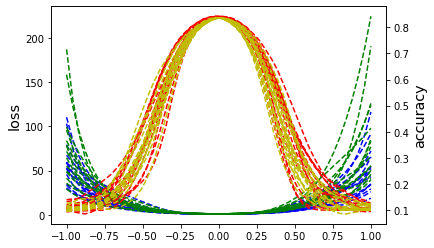

In [5]:
fig, ax_loss = plt.subplots()
ax_acc = ax_loss.twinx()
plt_axes=(ax_loss, ax_acc)

plot_loss_val(steps=steps, trials_evals=unbiased_evals, plt_axes=plt_axes)
plot_loss_val(steps=steps, trials_evals=biased_evals, plt_axes=plt_axes, plt_colors=('g', 'y'))
ax_loss.set_ylabel('loss', size="x-large")
ax_acc.set_ylabel('accuracy', size="x-large")
plt.show()

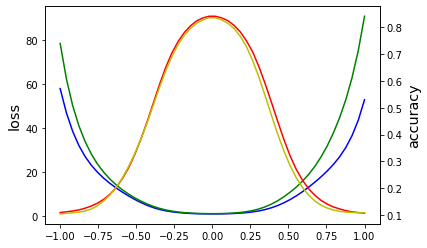

In [6]:
fig, ax_loss = plt.subplots()
ax_acc = ax_loss.twinx()
plt_axes=(ax_loss, ax_acc)

plot_loss_val(steps=steps, trials_evals=[mean_unbiased_evals], plt_axes=plt_axes, linestyle='-')
plot_loss_val(steps=steps, trials_evals=[mean_biased_evals], plt_axes=plt_axes, plt_colors=('g', 'y'), linestyle='-')
ax_loss.set_ylabel('loss', size="x-large")
ax_acc.set_ylabel('accuracy', size="x-large")
plt.show()

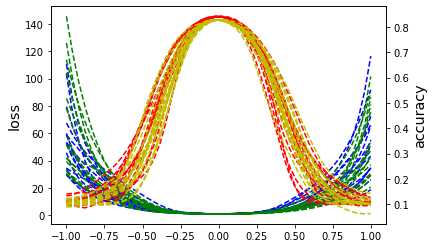

In [8]:
fig, ax_loss = plt.subplots()
ax_acc = ax_loss.twinx()
plt_axes=(ax_loss, ax_acc)

plot_loss_val(steps=steps, trials_evals=unbiased_evals, plt_axes=plt_axes)
plot_loss_val(steps=steps, trials_evals=biased_evals, plt_axes=plt_axes, plt_colors=('g', 'y'))
ax_loss.set_ylabel('loss', size="x-large")
ax_acc.set_ylabel('accuracy', size="x-large")
plt.show()

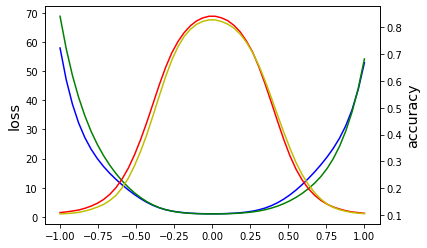

In [10]:
fig, ax_loss = plt.subplots()
ax_acc = ax_loss.twinx()
plt_axes=(ax_loss, ax_acc)

plot_loss_val(steps=steps, trials_evals=[mean_unbiased_evals], plt_axes=plt_axes, linestyle='-')
plot_loss_val(steps=steps, trials_evals=[mean_biased_evals], plt_axes=plt_axes, plt_colors=('g', 'y'), linestyle='-')
ax_loss.set_ylabel('loss', size="x-large")
ax_acc.set_ylabel('accuracy', size="x-large")
plt.show()

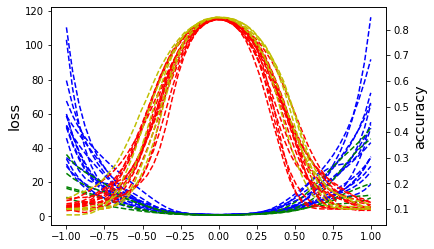

In [12]:
fig, ax_loss = plt.subplots()
ax_acc = ax_loss.twinx()
plt_axes=(ax_loss, ax_acc)

plot_loss_val(steps=steps, trials_evals=unbiased_evals, plt_axes=plt_axes)
plot_loss_val(steps=steps, trials_evals=unbiased_no_skip_evals, plt_axes=plt_axes, plt_colors=('g', 'y'))
ax_loss.set_ylabel('loss', size="x-large")
ax_acc.set_ylabel('accuracy', size="x-large")
plt.show()

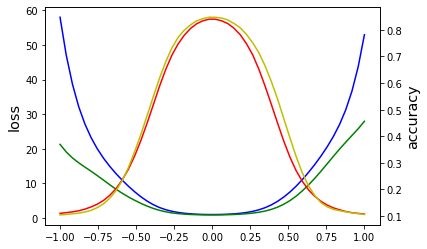

In [14]:
fig, ax_loss = plt.subplots()
ax_acc = ax_loss.twinx()
plt_axes=(ax_loss, ax_acc)

plot_loss_val(steps=steps, trials_evals=[mean_unbiased_evals], plt_axes=plt_axes, linestyle='-')
plot_loss_val(steps=steps, trials_evals=[mean_unbiased_no_skip_evals], plt_axes=plt_axes, plt_colors=('g', 'y'), linestyle='-')
ax_loss.set_ylabel('loss', size="x-large")
ax_acc.set_ylabel('accuracy', size="x-large")
plt.show()